In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from scipy.signal import find_peaks

In [12]:
#df = pd.read_csv("/home/stang/peak-detection-test/exosomes.raw_spectrum_1.csv")
df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")

In [13]:
subset = df[df['SpecID'].isin(["210526-3-09"])]
subset.head()

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
8020940,210526-3-09,0,200.00000,2644.1738,210526-3,Hyperglycemia
8020941,210526-3-09,1,200.68336,2672.0520,210526-3,Hyperglycemia
8020942,210526-3-09,2,201.36674,2637.1553,210526-3,Hyperglycemia
8020943,210526-3-09,3,202.05011,2633.9590,210526-3,Hyperglycemia
8020944,210526-3-09,4,202.73349,2655.8894,210526-3,Hyperglycemia


<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

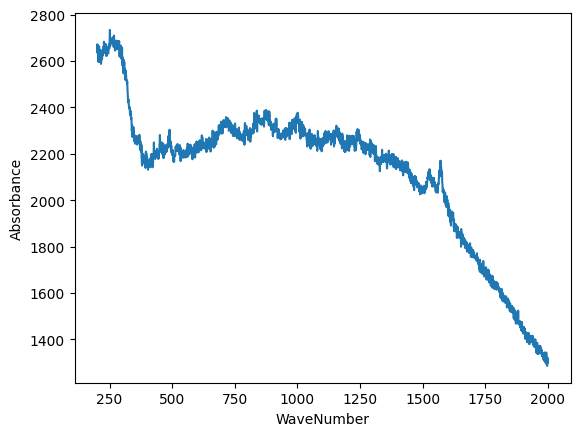

In [14]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=subset)

In [15]:
x = subset["Absorbance"]
x.index = subset["WaveNumber"]
x

WaveNumber
200.00000     2644.1738
200.68336     2672.0520
201.36674     2637.1553
202.05011     2633.9590
202.73349     2655.8894
                ...    
1997.26650    1321.0371
1997.94980    1316.4056
1998.63330    1311.2640
1999.31670    1318.0909
2000.00000    1300.7710
Name: Absorbance, Length: 2635, dtype: float64

In [16]:
peaks, _ =find_peaks(x=subset["Absorbance"], prominence=75)

In [22]:
print(peaks)

[  75  367  424  753  864  933  987 1047 1172 1290 1398 1522 1665 1704
 1942 2007 2127]


<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

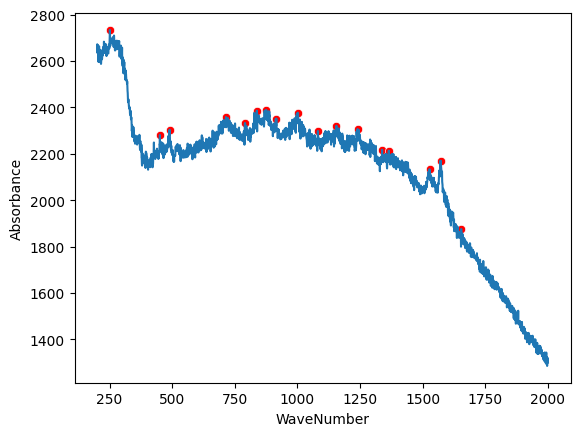

In [17]:
plt.plot(subset["WaveNumber"], subset["Absorbance"])
sns.scatterplot(data=subset.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", color="red")

In [18]:
cell_test = subset.iloc[peaks]

cell_test

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
8021015,210526-3-09,75,251.25285,2733.9106,210526-3,Hyperglycemia
8021307,210526-3-09,367,450.79727,2281.0176,210526-3,Hyperglycemia
8021364,210526-3-09,424,489.74942,2303.8423,210526-3,Hyperglycemia
8021693,210526-3-09,753,714.57861,2358.3406,210526-3,Hyperglycemia
8021804,210526-3-09,864,790.43280,2332.7898,210526-3,Hyperglycemia
8021873,210526-3-09,933,837.58545,2385.8726,210526-3,Hyperglycemia
8021927,210526-3-09,987,874.48749,2388.7783,210526-3,Hyperglycemia
8021987,210526-3-09,1047,915.48975,2351.7986,210526-3,Hyperglycemia
8022112,210526-3-09,1172,1000.91110,2377.0095,210526-3,Hyperglycemia
8022230,210526-3-09,1290,1081.54900,2298.4143,210526-3,Hyperglycemia


In [19]:
import math
p=[]
dist = []
src = []
dst = []

for i, row in cell_test.iterrows():
    p = [row["WaveNumber"], row["Absorbance"]]
    for j, row2 in cell_test.iterrows():
        q = [row2["WaveNumber"], row2["Absorbance"]]
        dst.append(j)
        dist.append(math.dist(p, q))
        src.append(i)

graph_dict = {"src": src, "dst":dst, "dist":dist}
graph_db_rels = pd.DataFrame(data=graph_dict)

graph_db_rels.drop(graph_db_rels[graph_db_rels["dist"] == 0].index, inplace=True)

graph_db_rels.head()

,src,dst,dist
1,8021015,8021307,494.904077
2,8021015,8021364,491.771651
3,8021015,8021693,596.425674
4,8021015,8021804,672.021514
5,8021015,8021873,681.847760


In [20]:
#cell_test.drop(["Seq", "SurID"], axis=1, inplace=True)

cell_test

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
8021015,210526-3-09,75,251.25285,2733.9106,210526-3,Hyperglycemia
8021307,210526-3-09,367,450.79727,2281.0176,210526-3,Hyperglycemia
8021364,210526-3-09,424,489.74942,2303.8423,210526-3,Hyperglycemia
8021693,210526-3-09,753,714.57861,2358.3406,210526-3,Hyperglycemia
8021804,210526-3-09,864,790.43280,2332.7898,210526-3,Hyperglycemia
8021873,210526-3-09,933,837.58545,2385.8726,210526-3,Hyperglycemia
8021927,210526-3-09,987,874.48749,2388.7783,210526-3,Hyperglycemia
8021987,210526-3-09,1047,915.48975,2351.7986,210526-3,Hyperglycemia
8022112,210526-3-09,1172,1000.91110,2377.0095,210526-3,Hyperglycemia
8022230,210526-3-09,1290,1081.54900,2298.4143,210526-3,Hyperglycemia


In [21]:
cell_test.to_csv("/home/stang/peak-detection-test/peaks.csv")

OSError: Cannot save file into a non-existent directory: '/home/stang/peak-detection-test'

In [ ]:
graph_db_rels.to_csv("/home/stang/peak-detection-test/dist.csv")